In [1]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [2]:
print("Hello World")

Hello World


In [58]:
import pandas as pd
from scipy.optimize import curve_fit

In [67]:
class calculator:
    # initialize function setting paramters a and b with defaults, and the x values for the linear function
    def __init__(self,a_=1,b_=1):
        self.a = a_
        self.b = b_
        self.myX = np.linspace(0,20,21)
        
    # function to perform addition
    def add(self):
        return self.a + self.b
    
    # function to perform substraction
    def sub(self):
        return self.a - self.b
    
    # function to perform multiplication
    def mult(self):
        return self.a * self.b
    
    # fit function to be used next
    def simpleLinearFunction(self,x, a, b):
        return a*x + b
    
    # function to calculate linear function from parameters a and b
    def getLinear(self):
        return self.simpleLinearFunction(self.myX, self.a, self.b)
    
    # function to write out the linear function obtained with a and b
    def writeLinear(self):
        # prepare data
        writeData = np.transpose(np.vstack((self.myX,self.getLinear())))
        
        # how to simply write out files with pandas
        linearWriter = pd.DataFrame(data = writeData,columns = ["# x","ax+b"])
        linearWriter.to_csv("linearFunction_pd.dat", sep = '\t', index = False, float_format = "%.3f")
        
        #how to write out files with numpy
        np.savetxt("linearFunction_np.dat", writeData, delimiter = '\t',header = "x\tax+b",fmt = "%.3f")
        
        return True
    
    # function to read in the linear function
    def readLinear(self, fn = "linearFunction_pd.dat"):
        # read in data using pandas:
        readData = pd.read_csv(fn, delimiter = '\t')
        x = readData.values[:,0]
        y = readData.values[:,1]
        
        # read in data using numpy:
        #readData = np.loadtxt(fn, delimiter = '\t')
        #x = readData[:,0]
        #y = readData[:,1]
        print(readData, x, y)
        
        # run the fit with x and y
        popt, pcov = curve_fit(self.simpleLinearFunction, x, y)
        self.a = popt[0]
        self.b = popt[1]
        
        # sanity check
        if( (self.getLinear() == y).all ):
            return True
        else:
            return False

In [68]:
# run some test output
test = calculator()
print(test.a, test.b, test.add(), test.sub(), test.mult())
hugo = calculator(4,2)
print(hugo.a, hugo.b, hugo.add(), hugo.sub(), hugo.mult())
#print(np.transpose(np.vstack((hugo.myX,hugo.getLinear()))))
hugo.writeLinear()
hugo.readLinear()

1 1 2 0 1
4 2 6 2 8
     # x  ax+b
0    0.0   2.0
1    1.0   6.0
2    2.0  10.0
3    3.0  14.0
4    4.0  18.0
5    5.0  22.0
6    6.0  26.0
7    7.0  30.0
8    8.0  34.0
9    9.0  38.0
10  10.0  42.0
11  11.0  46.0
12  12.0  50.0
13  13.0  54.0
14  14.0  58.0
15  15.0  62.0
16  16.0  66.0
17  17.0  70.0
18  18.0  74.0
19  19.0  78.0
20  20.0  82.0 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20.] [ 2.  6. 10. 14. 18. 22. 26. 30. 34. 38. 42. 46. 50. 54. 58. 62. 66. 70.
 74. 78. 82.]


True

<IPython.core.display.Javascript object>


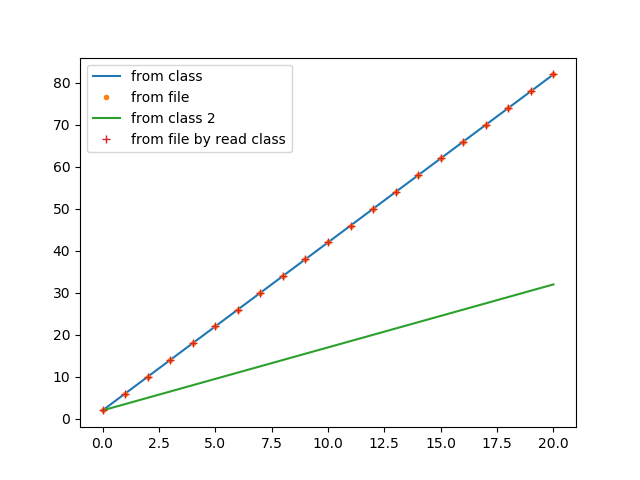

     # x  ax+b
0    0.0   2.0
1    1.0   6.0
2    2.0  10.0
3    3.0  14.0
4    4.0  18.0
5    5.0  22.0
6    6.0  26.0
7    7.0  30.0
8    8.0  34.0
9    9.0  38.0
10  10.0  42.0
11  11.0  46.0
12  12.0  50.0
13  13.0  54.0
14  14.0  58.0
15  15.0  62.0
16  16.0  66.0
17  17.0  70.0
18  18.0  74.0
19  19.0  78.0
20  20.0  82.0 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20.] [ 2.  6. 10. 14. 18. 22. 26. 30. 34. 38. 42. 46. 50. 54. 58. 62. 66. 70.
 74. 78. 82.]


In [75]:
figure()

#start with hugo
hugo = calculator(4,2)
plot(hugo.myX, hugo.getLinear(), label = "from class")

# read hugos data
hugo.writeLinear()
readInData = np.loadtxt("linearFunction_np.dat", delimiter = '\t')
plot(readInData[:,0], readInData[:,1],".", label = "from file")

# change hugo
hugo.a = 1.5
plot(hugo.myX, hugo.getLinear(), label = "from class 2")

# read in old parameters
hugo.readLinear("linearFunction_np.dat")
plot(hugo.myX, hugo.getLinear(),"+", label = "from file by read class")


legend(loc="best")
show()